# Classifiers in Python with sklearn

In [1]:
import numpy as np
import pandas as pd

# Load data
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/heights_weights.csv"
df = pd.read_csv(file_name)
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


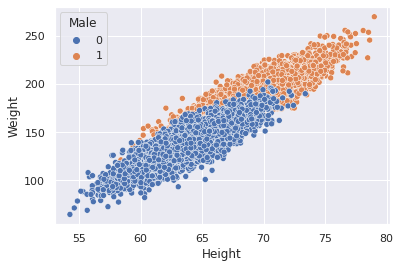

In [2]:
# Plotting our data
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.scatterplot(x="Height", y="Weight", hue="Male", data=df)

# Get our data ready and prepared for training in sklearn 

In [3]:
# Extract the columns we'll use for our data

x = df.iloc[:,0:2].values 
y = df.iloc[:,2].values

# Split data into our test and training datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [4]:
# Import our model and performance assessement classes from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Logestic Regression Performance

In [5]:
# Fit (train) the Logistic Regression classifier
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, Y_train)
logreg_prediction = logreg_clf.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, Y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(logreg_prediction, Y_test))
print(classification_report(logreg_prediction, Y_test))

Accuracy 91.87%
[[1385  140]
 [ 104 1371]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1525
           1       0.91      0.93      0.92      1475

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



# Random Forest Performance

In [6]:
# Fit (train) the Random Forest classifier
ranfor_clf = RandomForestClassifier()
ranfor_model = ranfor_clf.fit(X_train, Y_train)
ranfor_prediction = ranfor_clf.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_prediction, Y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(ranfor_prediction, Y_test))
print(classification_report(ranfor_prediction, Y_test))

Accuracy 90.17%
[[1373  179]
 [ 116 1332]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1552
           1       0.88      0.92      0.90      1448

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



# Support Vector Machine Performance

In [7]:
# Fit (train) the Support Vector Machine classifier
svm_clf = SVC()
svm_model = svm_clf.fit(X_train, Y_train)
svm_prediction = svm_clf.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_prediction, Y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(svm_prediction, Y_test))
print(classification_report(svm_prediction, Y_test))

Accuracy 91.40%
[[1382  151]
 [ 107 1360]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1533
           1       0.90      0.93      0.91      1467

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



# KNN Classifier Performance

In [8]:
# Fit (train) the KNN classifier
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(X_train, Y_train)
knn_prediction = knn_clf.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_prediction, Y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(knn_prediction, Y_test))
print(classification_report(knn_prediction, Y_test))

Accuracy 90.27%
[[1367  170]
 [ 122 1341]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1537
           1       0.89      0.92      0.90      1463

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



# KNN Sample Demo

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


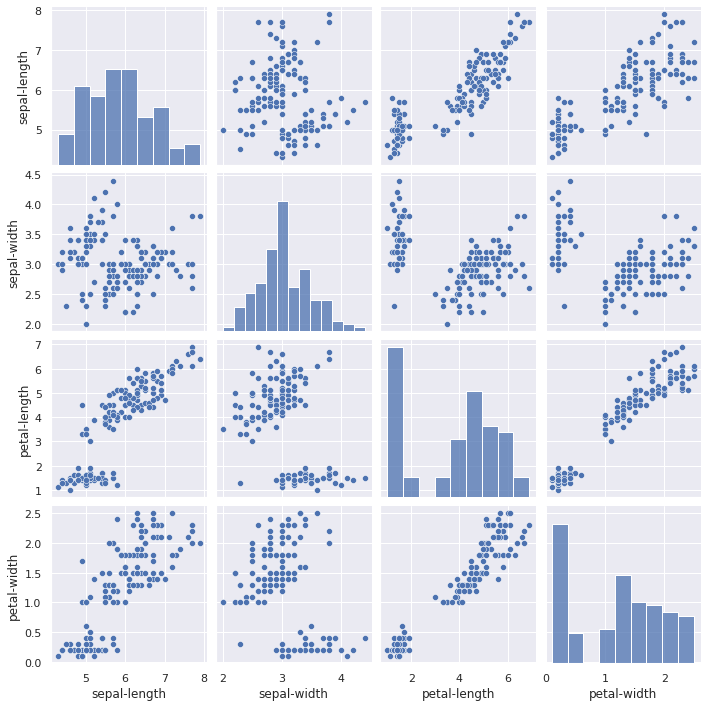

In [13]:
# Pair Plot Visualization
ax = sns.pairplot(data=dataset, kind='scatter')

In [15]:
# Spliting our dataset
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
# preproessing our dataset by scaling it
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

# X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Using KNN to train our dataset
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
# Evaluating our predictions
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))

[[ 7  0  0]
 [ 0 15  1]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30

Accuracy 96.67%


# Let's try a range of k values from 1 to 40

In [35]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

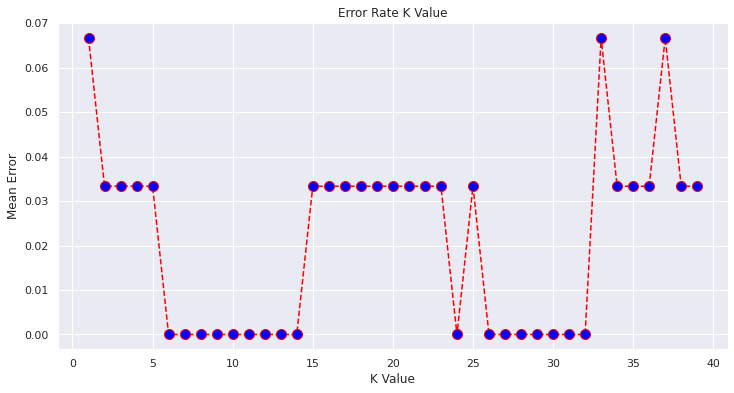

In [36]:
# Plot our results
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')